# $$ ANALYSIS OF LOAN APPLICATIONS$$

In [28]:
import pandas as pd
import numpy as np

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("train.csv")

In [31]:
df.shape

(614, 13)

In [32]:
pd.set_option('max_columns', 13)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
#we will drop the columns which are irrelevant for our analysis

In [36]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [37]:
df.drop(['CoapplicantIncome'],axis=1,inplace=True)

In [38]:
df.drop(['Loan_Amount_Term'],axis=1,inplace=True)

In [39]:
df.shape

(614, 10)

In [40]:
pd.set_option('max_columns', 10)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,NaN,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,128.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,1.0,Urban,Y


In [42]:
#we will use value_counts function is used to identify the different categories

In [41]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [44]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [45]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [46]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [47]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [49]:
#we will now see the top applicant income

In [50]:
df.nlargest(6,"ApplicantIncome")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3+,Graduate,No,81000,360.0,0.0,Rural,N
333,Male,Yes,0,Graduate,NaN,63337,490.0,1.0,Urban,Y
171,NaN,Yes,3+,Graduate,No,51763,700.0,1.0,Urban,Y
155,Male,Yes,3+,Graduate,No,39999,600.0,0.0,Semiurban,Y
185,Male,Yes,0,Graduate,Yes,39147,120.0,1.0,Semiurban,Y
443,Male,No,1,Graduate,No,37719,152.0,1.0,Semiurban,Y


In [ ]:
#We will use the get_group function to select a specific group
#below is all the application that are been accepted

In [52]:
df.groupby('Loan_Status').get_group('Y')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,NaN,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,3000,66.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,267.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,108.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,71.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,40.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,253.0,1.0,Urban,Y


In [ ]:
#we will now see all the not graduate applicants

In [59]:
df.groupby('Education').get_group('Not Graduate')


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
3,Male,Yes,0,Not Graduate,No,2583,120.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,95.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,3596,100.0,NaN,Urban,Y
18,Male,Yes,0,Not Graduate,No,4887,133.0,1.0,Rural,N
20,Male,Yes,0,Not Graduate,No,7660,104.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...
595,Male,No,0,Not Graduate,No,3833,110.0,1.0,Rural,Y
596,Male,Yes,2,Not Graduate,Yes,6383,187.0,1.0,Rural,N
601,Male,Yes,0,Not Graduate,NaN,2894,155.0,1.0,Rural,Y
605,Male,Yes,0,Not Graduate,No,2400,NaN,1.0,Urban,N


In [ ]:
#we will now see the education wise applicants income 

In [60]:
df.groupby('Education').ApplicantIncome.describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,480.0,5857.433333,6739.797954,150.0,2998.75,4000.0,6068.75,81000.0
Not Graduate,134.0,3777.283582,2237.081586,210.0,2583.00,3357.5,4333.00,18165.0


In [61]:
#now we will use query function to analyze data
#below are all the not graduate that are given loan

In [63]:
df.query('Education == "Not Graduate" and Loan_Status == "Y"')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
3,Male,Yes,0,Not Graduate,No,2583,120.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,95.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,3596,100.0,NaN,Urban,Y
27,Male,Yes,2,Not Graduate,No,4226,110.0,1.0,Urban,Y
39,Male,No,0,Not Graduate,No,3748,110.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...
565,Male,Yes,0,Not Graduate,No,4467,120.0,NaN,Rural,Y
587,Female,No,0,Not Graduate,No,2165,70.0,1.0,Semiurban,Y
595,Male,No,0,Not Graduate,No,3833,110.0,1.0,Rural,Y
601,Male,Yes,0,Not Graduate,NaN,2894,155.0,1.0,Rural,Y


In [ ]:
#below are all the non married person given loan

In [64]:
df.query('Married == "No" and Loan_Status == "Y"')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,NaN,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,1.0,Urban,Y
15,Male,No,0,Graduate,No,4950,125.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,3596,100.0,NaN,Urban,Y
29,Female,No,2,Graduate,NaN,3750,120.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...
588,NaN,No,0,Graduate,No,4750,94.0,1.0,Semiurban,Y
592,NaN,No,3+,Graduate,Yes,9357,292.0,1.0,Semiurban,Y
595,Male,No,0,Not Graduate,No,3833,110.0,1.0,Rural,Y
603,Male,No,0,Graduate,No,3676,172.0,1.0,Rural,Y


In [ ]:
#we will now see all the applicant income above 5000

In [65]:
df.query('ApplicantIncome >5000')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,NaN,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,267.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,349.0,1.0,Semiurban,N
20,Male,Yes,0,Not Graduate,No,7660,104.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...
599,Male,Yes,2,Graduate,No,5780,192.0,1.0,Urban,Y
602,Male,Yes,3+,Graduate,No,5703,128.0,1.0,Urban,Y
604,Female,Yes,1,Graduate,No,12000,496.0,1.0,Semiurban,Y
611,Male,Yes,1,Graduate,No,8072,253.0,1.0,Urban,Y


In [67]:
#we will now use some feature engineering mehtods
#we will create a new column

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Netamount', ylabel='Density'>

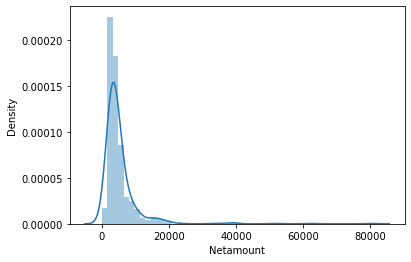

In [68]:
df['Netamount'] = (df['ApplicantIncome'] - df['LoanAmount'])
sns.distplot(df['Netamount'])

In [69]:
#lets calculate the EMI for loan amount, for example lets assume loan amount is divided for 6 EMI

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMI', ylabel='Density'>

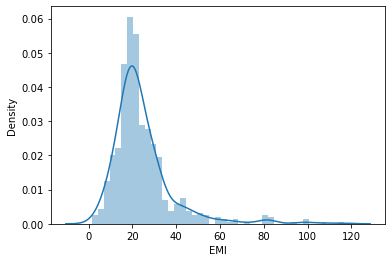

In [72]:
df['EMI'] = (df['LoanAmount']/ 6 )
sns.distplot(df['EMI'])

In [73]:
#we will now use the bin function for category
#we will divide the data as per application income slabs

In [74]:
def approval(x):
    if x < 40000:
        return 'Not eligible'
    if x > 40000 and x < 60000:
        return 'check cibil'
    else:
        return 'eligible'
    
df['ApplicantIncome'] = df['ApplicantIncome'].apply(approval)


df['ApplicantIncome'].value_counts()

Not eligible    611
eligible          2
check cibil       1
Name: ApplicantIncome, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

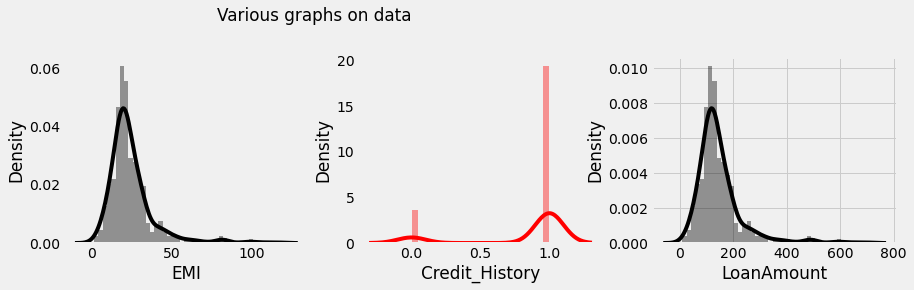

In [77]:
plt.rcParams['figure.figsize'] = (18, 7)
plt.style.use('fivethirtyeight')



plt.subplot(2, 4, 2)
sns.distplot(df['EMI'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(df['Credit_History'], color = 'red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(df['LoanAmount'], color = 'black')
plt.grid()


plt.grid()

plt.suptitle('Various graphs on data')
plt.show()

In [78]:
#Sorting the unique categories of the Item Type column

In [79]:
dt = np.sort(df['Property_Area'].unique())

In [80]:
dt

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [81]:
#Finding the average income based on the education

In [89]:
y=df['LoanAmount'].groupby(df['ApplicantIncome']).agg('mean')

In [90]:
y

ApplicantIncome
Not eligible    144.526316
check cibil     700.000000
eligible        425.000000
Name: LoanAmount, dtype: float64

In [ ]:
#Replacing the categories by the mean of the target variable

In [91]:
df['ApplicantIncome']=df['ApplicantIncome'].replace((dt),(y.values))

In [92]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,...,Credit_History,Property_Area,Loan_Status,Netamount,EMI
0,Male,No,0,Graduate,No,...,1.0,Urban,Y,NaN,NaN
1,Male,Yes,1,Graduate,No,...,1.0,Rural,N,4455.0,21.333333
2,Male,Yes,0,Graduate,Yes,...,1.0,Urban,Y,2934.0,11.000000
3,Male,Yes,0,Not Graduate,No,...,1.0,Urban,Y,2463.0,20.000000
4,Male,No,0,Graduate,No,...,1.0,Urban,Y,5859.0,23.500000


In [93]:
#data visualization 

<AxesSubplot:title={'center':'Loan_Status'}>

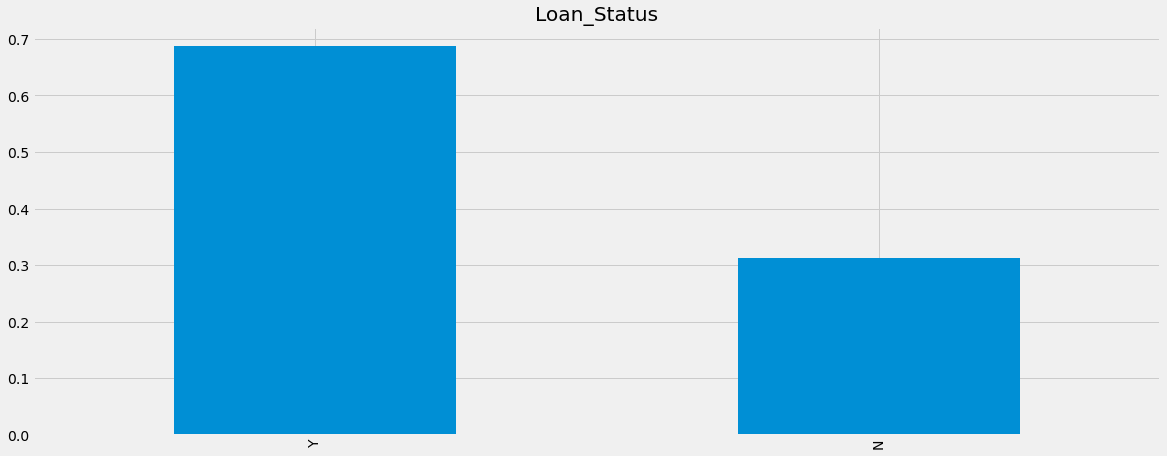

In [94]:
df["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

<AxesSubplot:title={'center':'Gender'}>

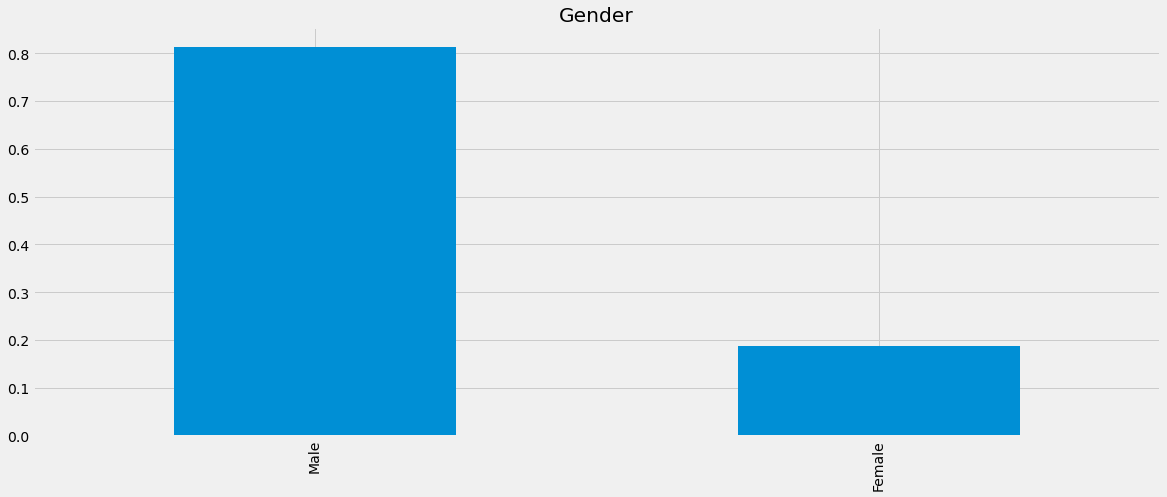

In [95]:
df['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

<AxesSubplot:title={'center':'Self_Employed'}>

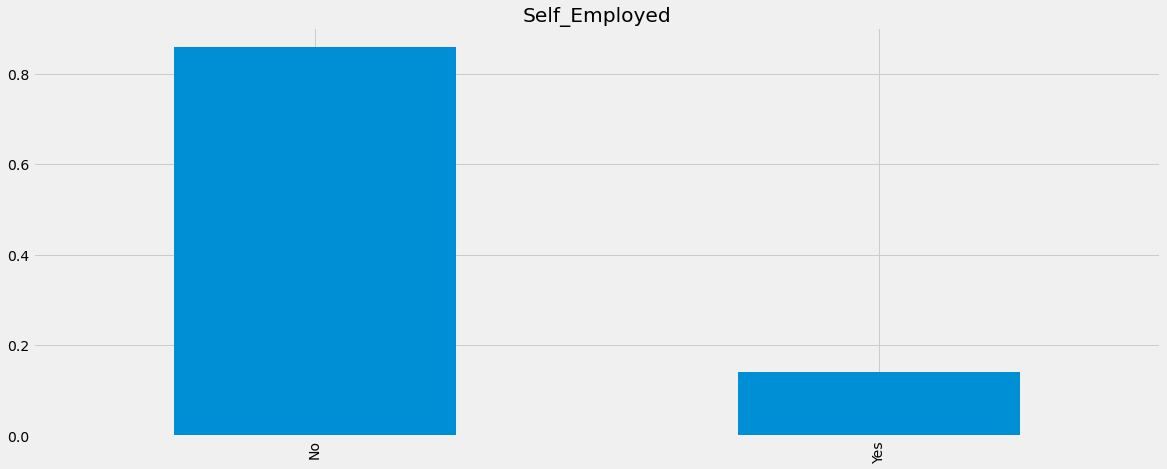

In [96]:
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

<AxesSubplot:title={'center':'Dependents'}>

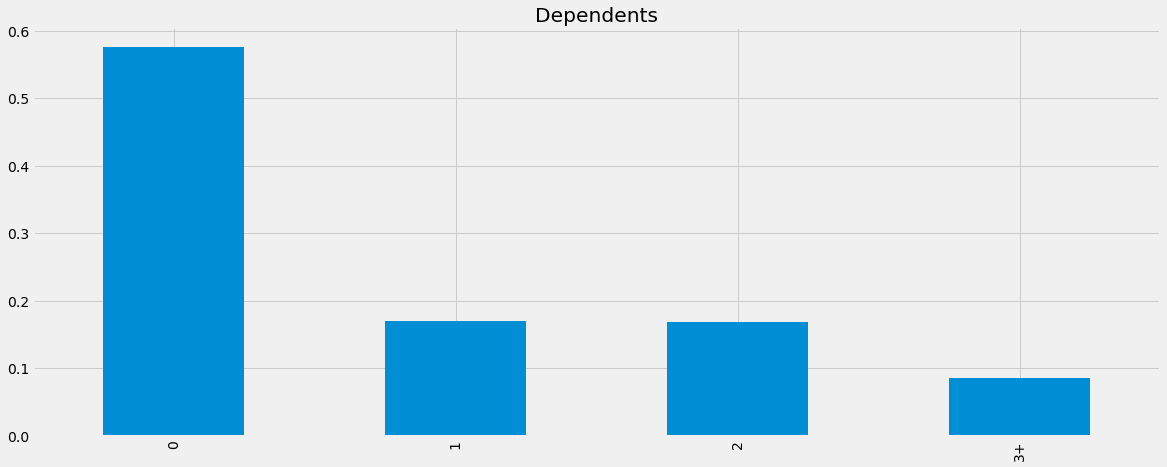

In [97]:
df['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

<AxesSubplot:title={'center':'Property_Area'}>

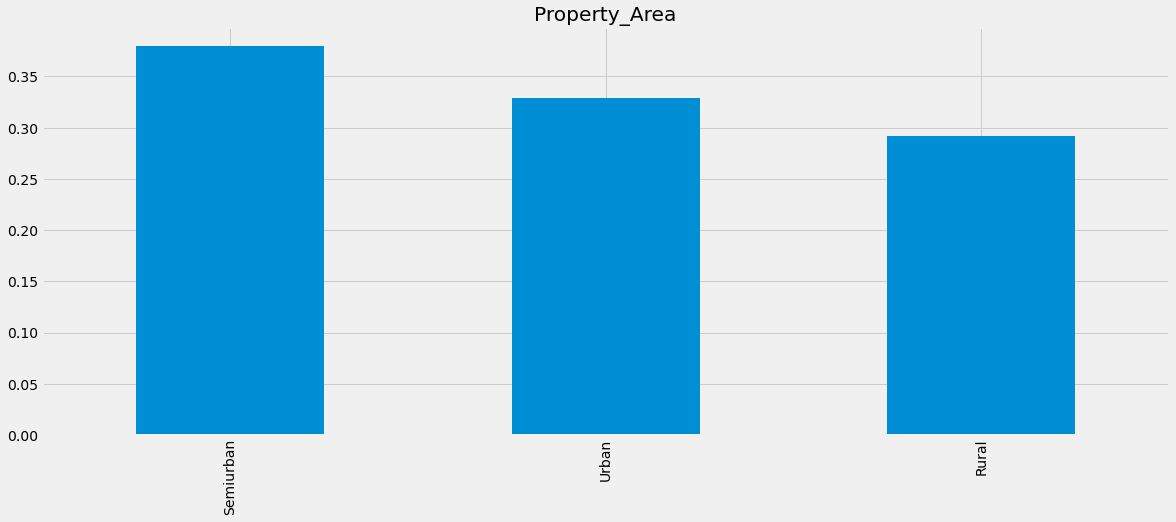

In [98]:
df["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

<AxesSubplot:title={'center':'EMI'}>

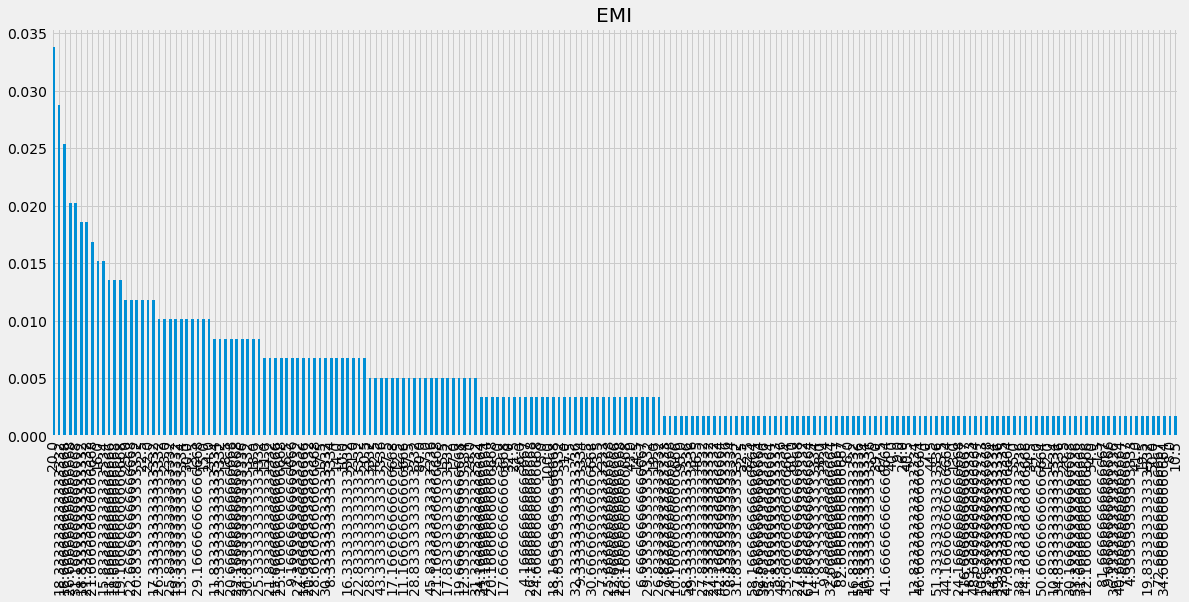

In [100]:
df["EMI"].value_counts(normalize=True).plot.bar(title="EMI")

In [ ]:
#plot shoiwng loan status and maried relation

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


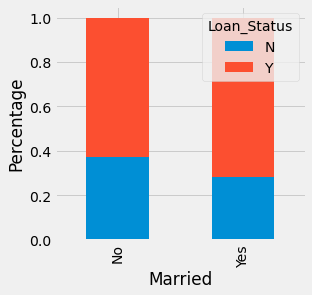

In [101]:
print(pd.crosstab(df["Married"],df["Loan_Status"]))
Married=pd.crosstab(df["Married"],df["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()